In [2]:
import numpy as np
import os.path as ptt
import AGNdecomp as agnd
from astropy.io import fits
from AGNdecomp.tools.prof_fit import prof_ana
from AGNdecomp.tools.models import get_model
from AGNdecomp.tools.tools import plot_outputs
from AGNdecomp.tools.tools import sycall
import warnings
warnings.filterwarnings('ignore', category=Warning)

In [15]:
plateID='8713'
ifuID='9102'

plateID='11944'
ifuID='12704'

sycall('mkdir -p data_dir')
call='/usr/local/bin/wget https://data.sdss.org/sas/dr17/manga/spectro/redux/v3_1_1/PLATE/stack/manga-PLATE-IFU-LINCUBE.fits.gz'.replace('PLATE',plateID).replace('IFU',ifuID)
if ptt.exists('data_dir/manga-PLATE-IFU-LINCUBE.fits.gz'.replace('PLATE',plateID).replace('IFU',ifuID)) == False:
    sycall(call)
    sycall('mv manga-PLATE-IFU-LINCUBE.fits.gz data_dir/.'.replace('PLATE',plateID).replace('IFU',ifuID))
cube_name='manga-PLATE-IFU-LINCUBE.fits.gz'.replace('PLATE',plateID).replace('IFU',ifuID)
#cube_name='manga-PLATE-IFU.cube.fits.gz'.replace('PLATE',plateID).replace('IFU',ifuID)

0.05910263 Flux
0.5000004
5741.0
Multiprocessing took 25.2 seconds


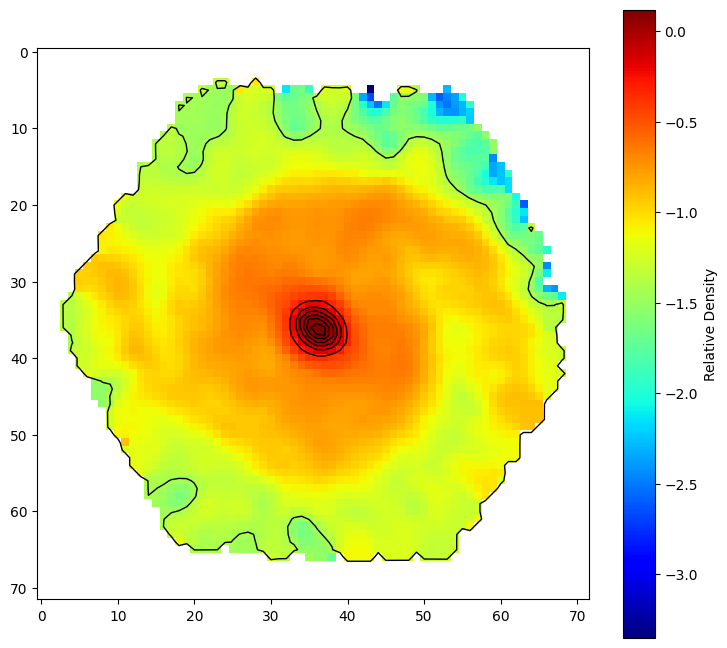

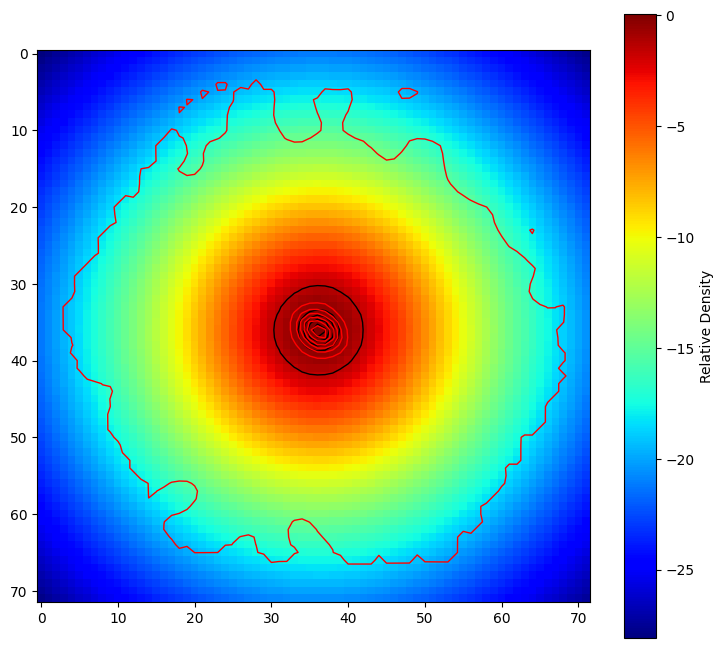

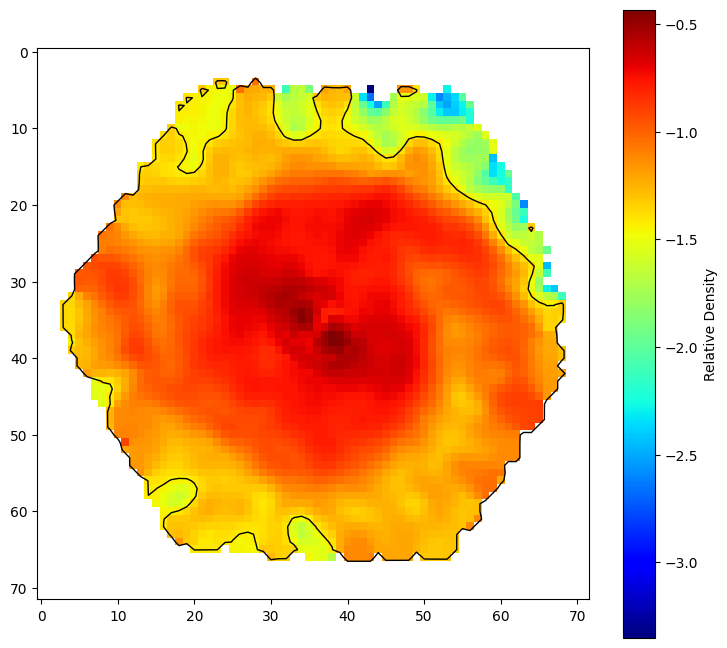

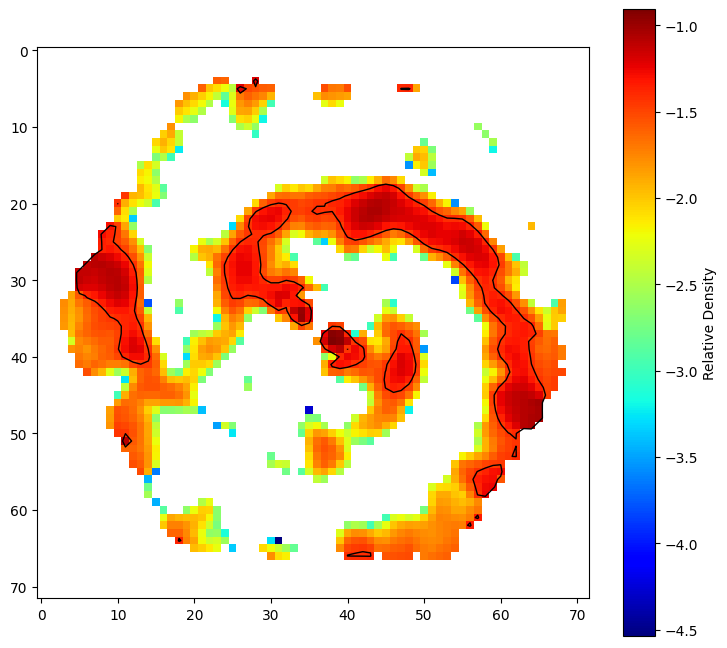

FLUX= 33.27341081380919 FLUXN= 353.38495 RADEC= 16h13m01.619832s +37d17m14.94263302s x_1= 36.175860553718685 y_1= 36.06526602150158 alpha_1= 7.6739158085659325 beta_1= 26.0 psf_1= 2.5227489383567434 Io= 0.12884185856734598 bn= 0.6774781069382391 Re= 16.28726321629025 ns= 0.5997231104159941 At0= 1.124071925789762 e= 0 th0= 0


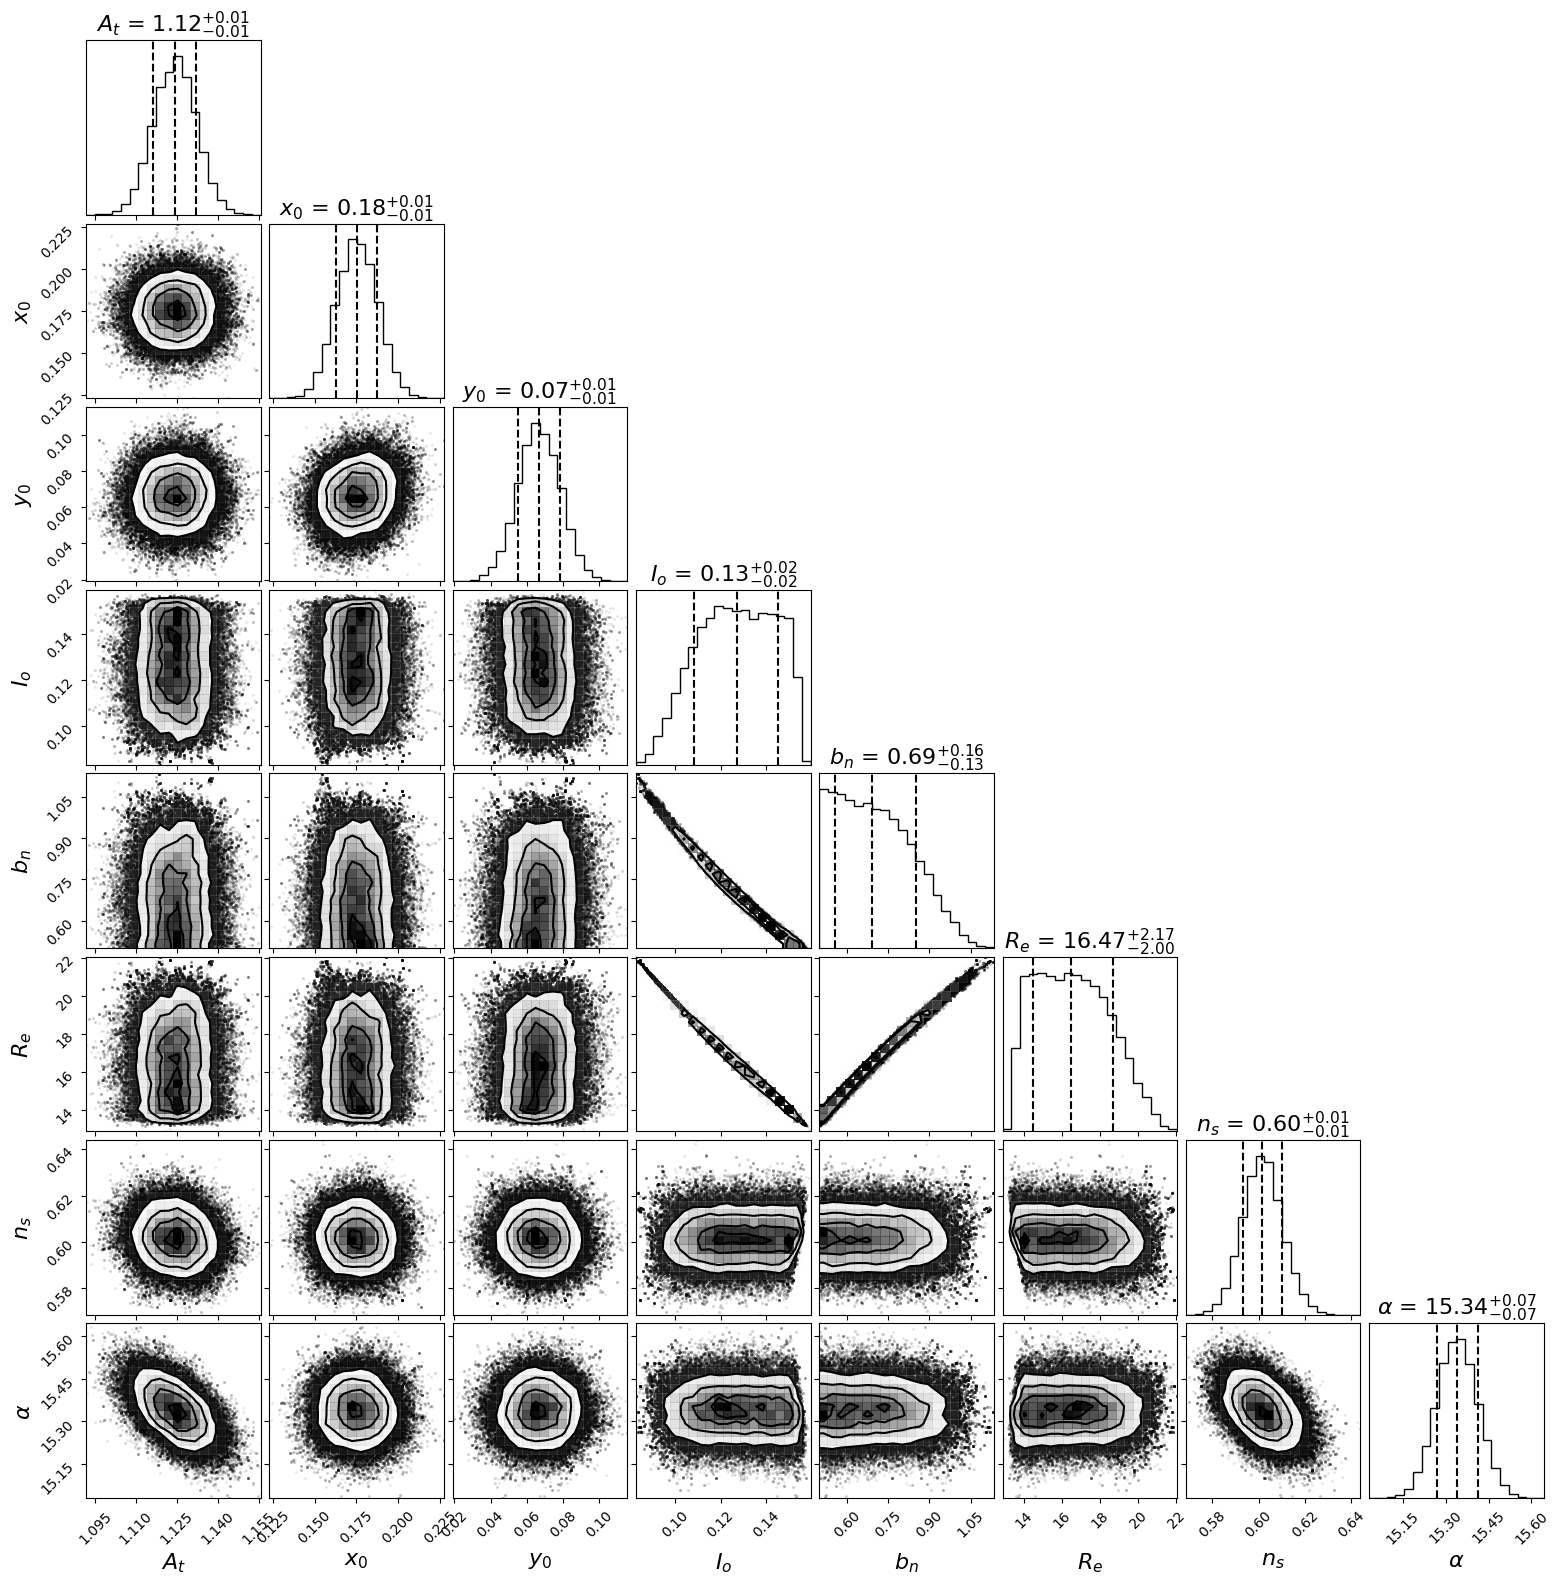

In [17]:
dir_cube='data_dir/'
[cube_data, hdr0]=fits.getdata(dir_cube+cube_name, 'FLUX', header=True)
cube_dataIvr=fits.getdata(dir_cube+cube_name, 'IVAR', header=False)
cube_data[np.where(np.isfinite(cube_data) == False)]=np.nan
print(np.nanmean(cube_data),'Flux')
cube_dataE=1.0/np.sqrt(cube_dataIvr)
cube_dataE[np.where(np.isfinite(cube_dataE) == False)]=np.nan
#print(np.nanmean(cube_dataE),'EFlux')
#cube_dataE=fits.getdata(dir_cube+cube_name,1,header=False)
      
cube_dataE[np.where(cube_dataE == 1)]=np.nan
cube_data=cube_data
dir_out='out_dir/'
name=hdr0['MANGAID']
verbose=True
test=True
ncpus=5
sampling=20
ellipse=False
intpsf=False
clean=True
fcenter=False

if clean:
    str_p=False
else:
    str_p=True
if test:
    local=True
else:
    local=False
if intpsf:
    psft=False
else:
    psft=True    
psamp=sampling

prof_ana(cube_data,cube_dataE,hdr0,dir_o=dir_out,name=name,verbose=verbose,local=local,moffat=True,mc=True,ncpu=ncpus,
             sp=sampling,bt=26.0,psf_t=True,str_p=str_p,psft=psft,trip=False,vas='',ellip=ellipse,psamp=psamp,fcenter=fcenter)

In [13]:
call='run_agndec run --name manga-11944-12704 --path /Users/hjibarram/Paper_decomposition/temp/MaNGA_ana/data/ --ncpus 6 --nameb=NAME.cube.fits.gz --verbose --sampling 20 --fcenter --clean --path_out outputs/ --test'
sycall(call)

0.5000004
6800.5


Multiprocessing took 27.8 seconds
Figure(748x660)
Figure(748x660)
Figure(748x660)
Figure(748x660)
FLUX= 1.5453097763663277 FLUXN= 32.45859 RADEC= 16h13m01.61427182s +37d17m14.93861554s x_1= 36.30857192309352 y_1= 36.057231112254996 alpha_1= 9.24943339643527 beta_1= 26.0 psf_1= 3.040689898527704 Io= 0.010569838527588341 bn= 2.8570313302790806 Re= 2.213011082889012 ns= 0.5000085866666217 At0= 0.03593487452586096 e= 0 th0= 0
